# Solar Power Generation Data Analytics Project

**1- Exploratory Data Analysis (EDA):**

- **1-1 Basic data exploration:** Start with EDA to better understand your data's structure, including descriptive statistics, variable distributions, and handling missing data.

- **1-2 Temporal trends:** Analyze solar generation over time to spot seasonal patterns or trends across the year, month, or day.

- **1-3 Correlation:** Examine the relationship between solar generation data and climate variables such as ambient temperature and irradiance. How do these variables impact solar generation?



*Colombero, Nicolas - ARG*  
*nicolasscolombero@gmail.com*  
*[GitHub](https://github.com/nicolasscolombero)*  
*[LinkedIn](https://www.linkedin.com/in/nicolascolombero/)*



In [28]:
import numpy as np 
import pandas as pd 
import math as math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
dfG1 = pd.read_csv('../SolarGeneration/Plant_1_Generation_Data.csv')
dfG2 = pd.read_csv('../SolarGeneration/Plant_2_Generation_Data.csv')
dfW1 = pd.read_csv('../SolarGeneration/Plant_1_Weather_Sensor_Data.csv')
dfW2 = pd.read_csv('../SolarGeneration/Plant_2_Weather_Sensor_Data.csv')

In [4]:
#cleaning data
dfG1['DATE_TIME'] = pd.to_datetime(dfG1['DATE_TIME'], errors='coerce')
dfG2['DATE_TIME'] = pd.to_datetime(dfG2['DATE_TIME'], errors='coerce')
dfW1['DATE_TIME'] = pd.to_datetime(dfW1['DATE_TIME'], errors='coerce')
dfW2['DATE_TIME'] = pd.to_datetime(dfW2['DATE_TIME'], errors='coerce')

dfG1['TIME'] = dfG1['DATE_TIME'].dt.time
dfG2['TIME'] = dfG2['DATE_TIME'].dt.time
dfW1['TIME'] = dfW1['DATE_TIME'].dt.time
dfW2['TIME'] = dfW2['DATE_TIME'].dt.time

dfG1['DATE'] = pd.to_datetime(dfG1['DATE_TIME'].dt.date)
dfG2['DATE'] = pd.to_datetime(dfG2['DATE_TIME'].dt.date)
dfW1['DATE'] = pd.to_datetime(dfW1['DATE_TIME'].dt.date)
dfW2['DATE'] = pd.to_datetime(dfW2['DATE_TIME'].dt.date)

In [5]:
dfG1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
 7   TIME         68778 non-null  object        
 8   DATE         68778 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


In [6]:
dfG2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    67698 non-null  datetime64[ns]
 1   PLANT_ID     67698 non-null  int64         
 2   SOURCE_KEY   67698 non-null  object        
 3   DC_POWER     67698 non-null  float64       
 4   AC_POWER     67698 non-null  float64       
 5   DAILY_YIELD  67698 non-null  float64       
 6   TOTAL_YIELD  67698 non-null  float64       
 7   TIME         67698 non-null  object        
 8   DATE         67698 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
dfW1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
 6   TIME                 3182 non-null   object        
 7   DATE                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 199.0+ KB


In [8]:
dfW2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   TIME                 3259 non-null   object        
 7   DATE                 3259 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 203.8+ KB


## 1-1 Basic data exploration

**Dataset: Solar Generation Data**

- **DATE_TIME:** Date and time when the data was recorded (*datetime64[ns]*).
- **PLANT_ID:** ID of the solar plant (*int64*).
- **SOURCE_KEY:** Identifier for the source of solar generation (*object*).
- **DC_POWER:** Direct current (DC) power generated (*float64*).
- **AC_POWER:** Alternating current (AC) power generated (*float64*).
- **DAILY_YIELD:** Total daily yield of power (*float64*).
- **TOTAL_YIELD:** Cumulative yield of power (*float64*).
- **DATE:** Date of data recording (*datetime64[ns]*).
- **TIME:** Time of data recording (*datetime64[ns]*).
- **HOUR:** Hour of the day (*int64*).
- **MINUTES:** Minutes of the hour (*int64*).

**Dataset: Climate Data**

- **DATE_TIME:** Date and time when the data was recorded (*datetime64[ns]*).
- **PLANT_ID:** ID of the solar plant (*int64*).
- **SOURCE_KEY:** Identifier for the source of climate data (*object*).
- **AMBIENT_TEMPERATURE:** Ambient temperature at the solar plant (*float64*).
- **MODULE_TEMPERATURE:** Temperature of the solar modules (*float64*).
- **IRRADIATION:** Solar irradiance, a measure of solar radiation (*float64*).
- **DATE:** Date of data recording (*datetime64[ns]*).
- **TIME:** Time of data recording (*datetime64[ns]*).
- **HOUR:** Hour of the day (*int64*).
- **MINUTES:** Minutes of the hour (*int64*).


## 1-2 Temporal trends

### 1-2-1 Generation temporal trends

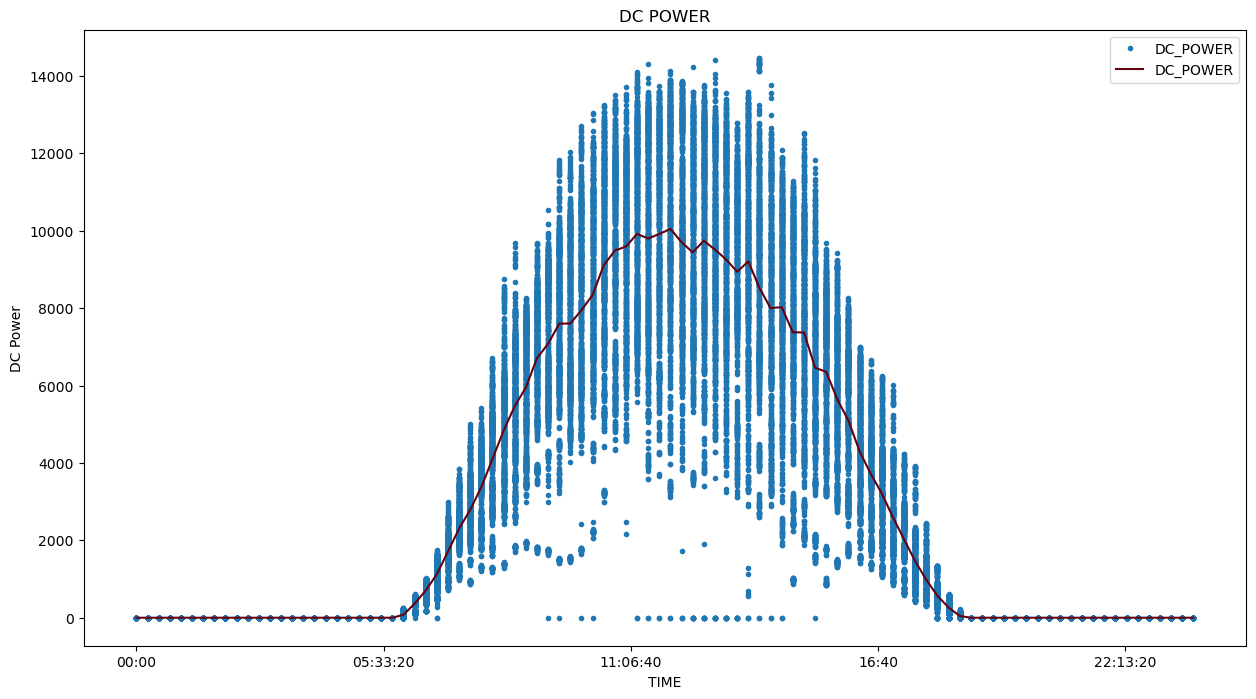

In [9]:
dfG1.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG1.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

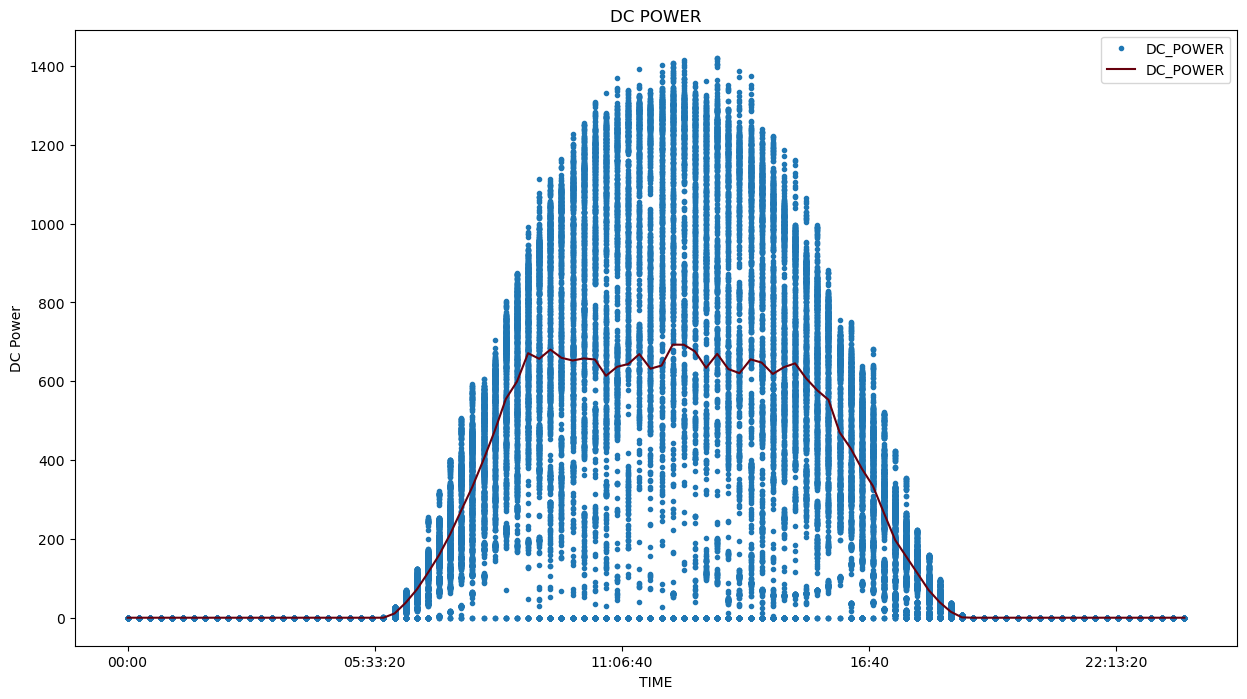

In [10]:
dfG2.plot(x= 'TIME', y='DC_POWER', style='.', figsize = (15, 8))
dfG2.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER')
plt.show()

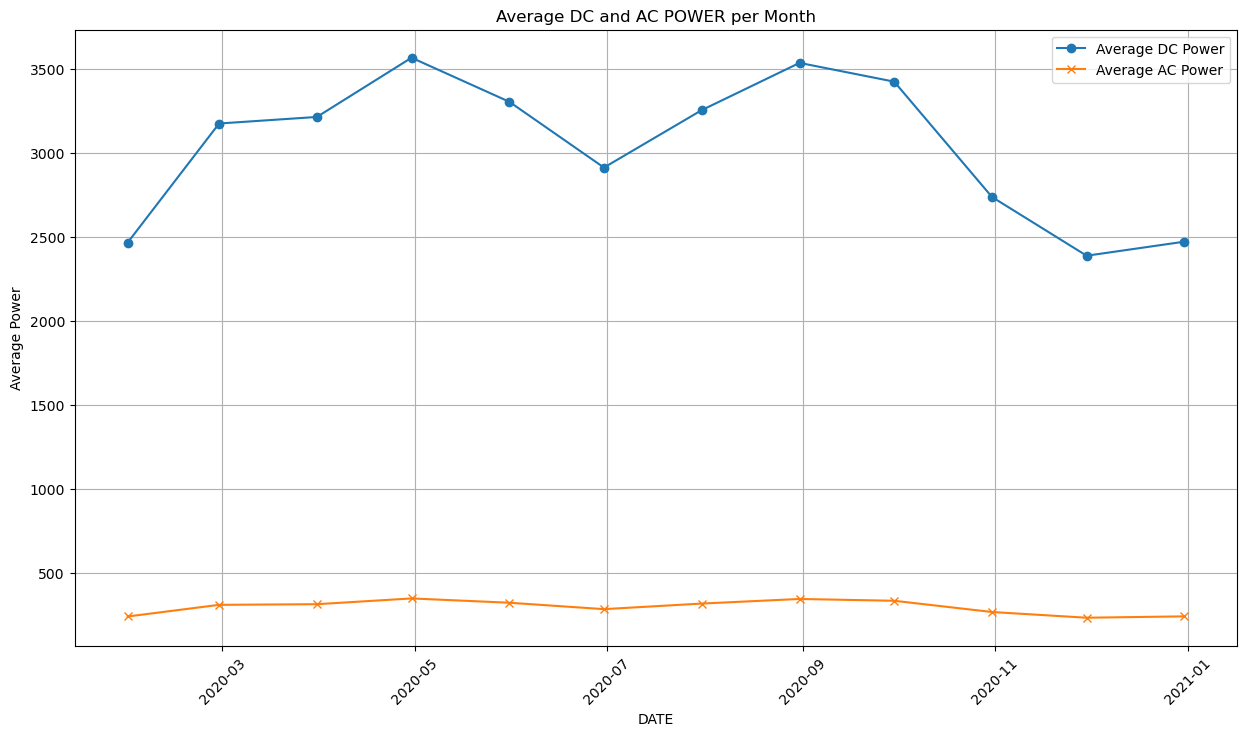

In [11]:
# Calculate the average DC POWER per month
average_dc_power_per_month = dfG1.resample('M', on='DATE')['DC_POWER'].mean()

# Calculate the average AC POWER per month
average_ac_power_per_month = dfG1.resample('M', on='DATE')['AC_POWER'].mean()

# Create the 2D plot
plt.figure(figsize=(15, 8))
plt.plot(average_dc_power_per_month.index, average_dc_power_per_month.values, marker='o', linestyle='-', label='Average DC Power')
plt.plot(average_ac_power_per_month.index, average_ac_power_per_month.values, marker='x', linestyle='-', label='Average AC Power')
plt.xlabel('DATE')
plt.ylabel('Average Power')
plt.title('Average DC and AC POWER per Month')
plt.grid(True)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish between DC and AC Power curves
plt.legend()

# Show the plot
plt.show()

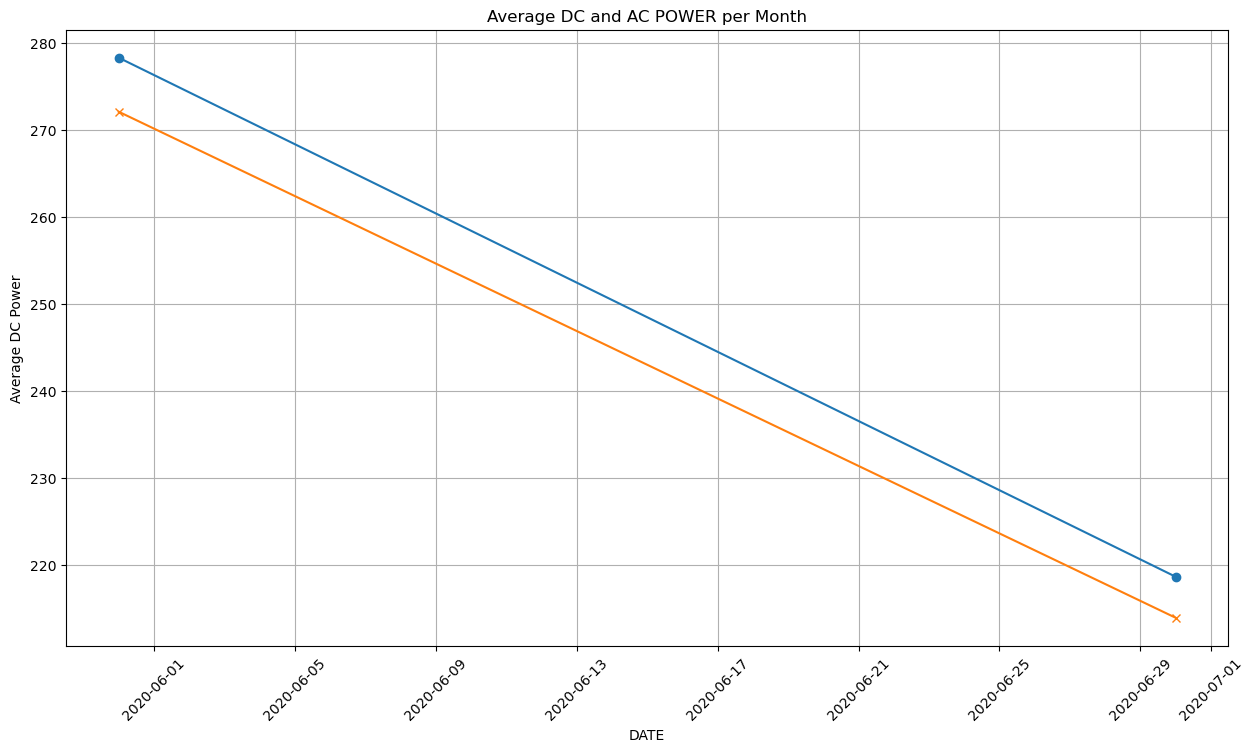

In [12]:
# Calculate the average DC POWER per month
average_dc_power_per_month2 = dfG2.resample('M', on='DATE')['DC_POWER'].mean()

# Calculate the average AC POWER per month
average_ac_power_per_month2 = dfG2.resample('M', on='DATE')['AC_POWER'].mean()

# Create the 2D plot
plt.figure(figsize=(15, 8))
plt.plot(average_dc_power_per_month2.index, average_dc_power_per_month2.values, marker='o', linestyle='-', label='Average DC Power')
plt.plot(average_ac_power_per_month2.index, average_ac_power_per_month2.values, marker='x', linestyle='-', label='Average AC Power')
plt.xlabel('DATE')
plt.ylabel('Average DC Power')
plt.title('Average DC and AC POWER per Month')
plt.grid(True)

# Rotate the X-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### 1-2-2 Climate temporal trends

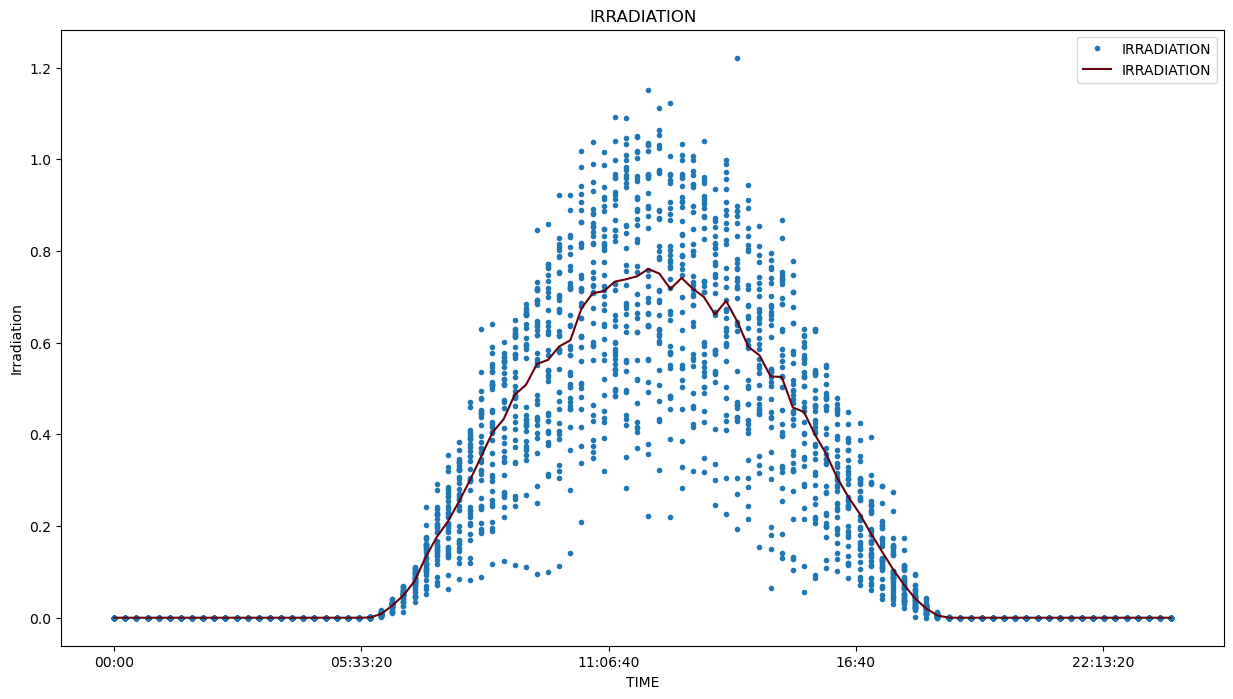

In [13]:
dfW1.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 8))
dfW1.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('Irradiation')
plt.title('IRRADIATION')
plt.show()

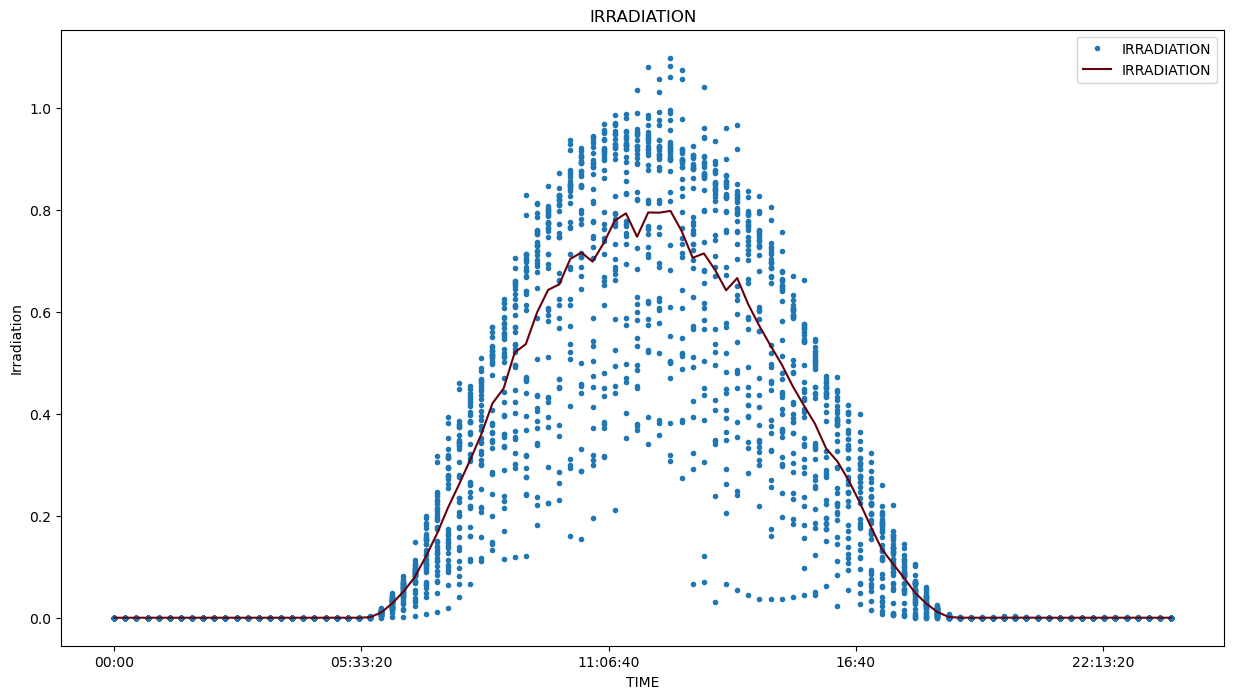

In [14]:
dfW2.plot(x= 'TIME', y='IRRADIATION', style='.', figsize = (15, 8))
dfW2.groupby('TIME')['IRRADIATION'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('Irradiation')
plt.title('IRRADIATION')
plt.show()

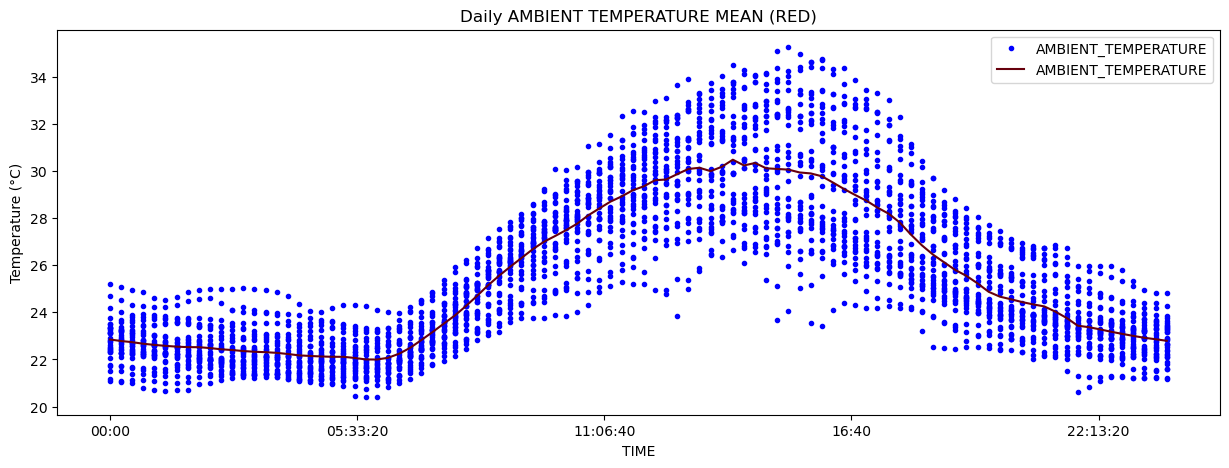

In [15]:
dfW1.plot(x='TIME', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(15,5))
dfW1.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

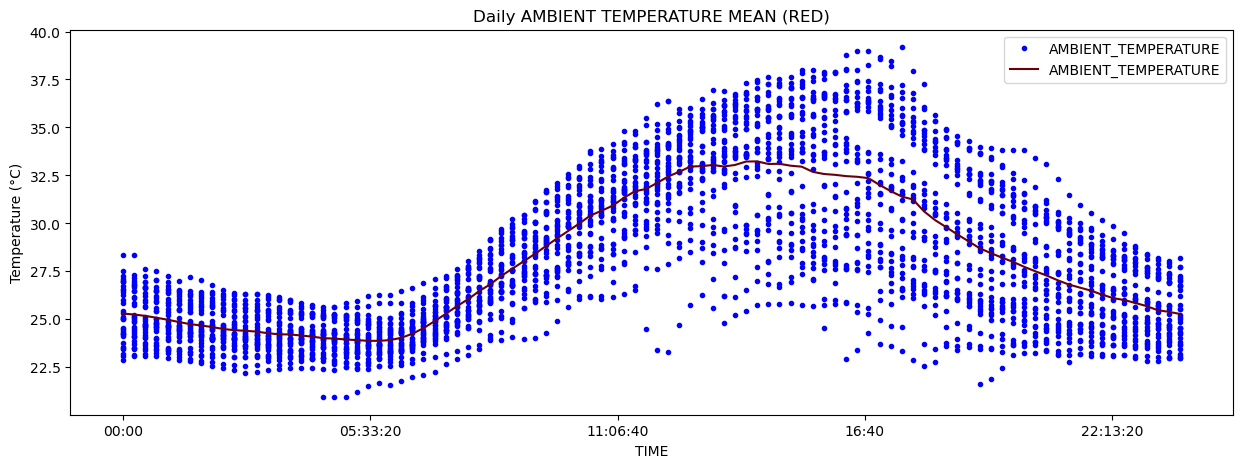

In [16]:
dfW2.plot(x='TIME', y = 'AMBIENT_TEMPERATURE' , style='b.', figsize=(15,5))
dfW2.groupby('TIME')['AMBIENT_TEMPERATURE'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.title('Daily AMBIENT TEMPERATURE MEAN (RED)')
plt.ylabel('Temperature (°C)')
plt.show()

Text(0, 0.5, 'Temperature (°C)')

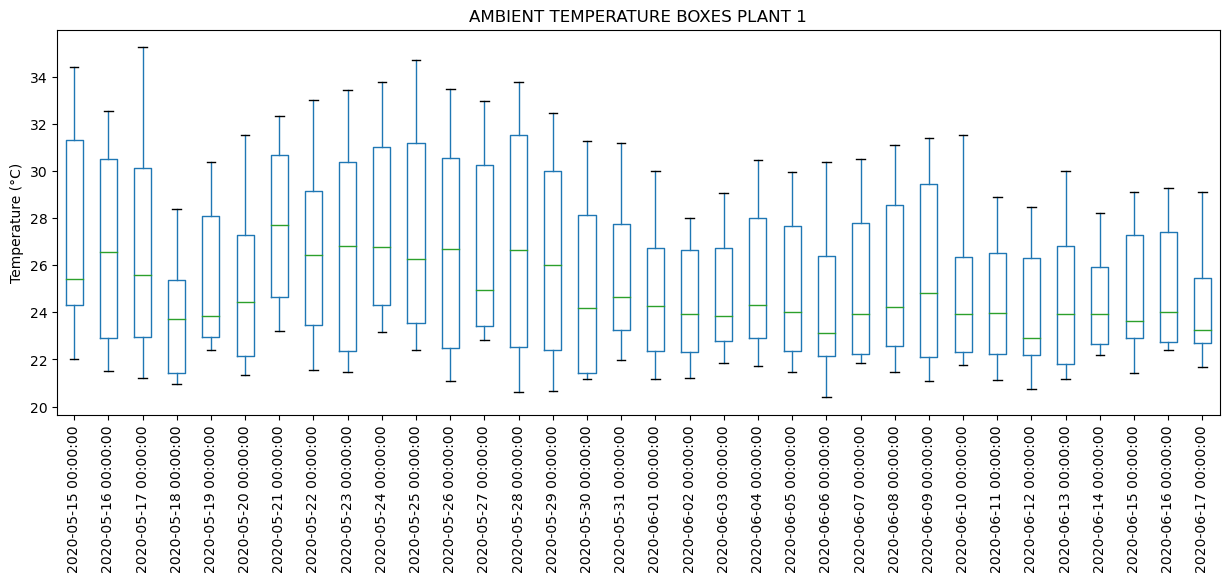

In [17]:
amb_temp = dfW1.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
amb_temp.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('AMBIENT TEMPERATURE BOXES PLANT 1')
plt.ylabel('Temperature (°C)')


Text(0, 0.5, 'Temperature (°C)')

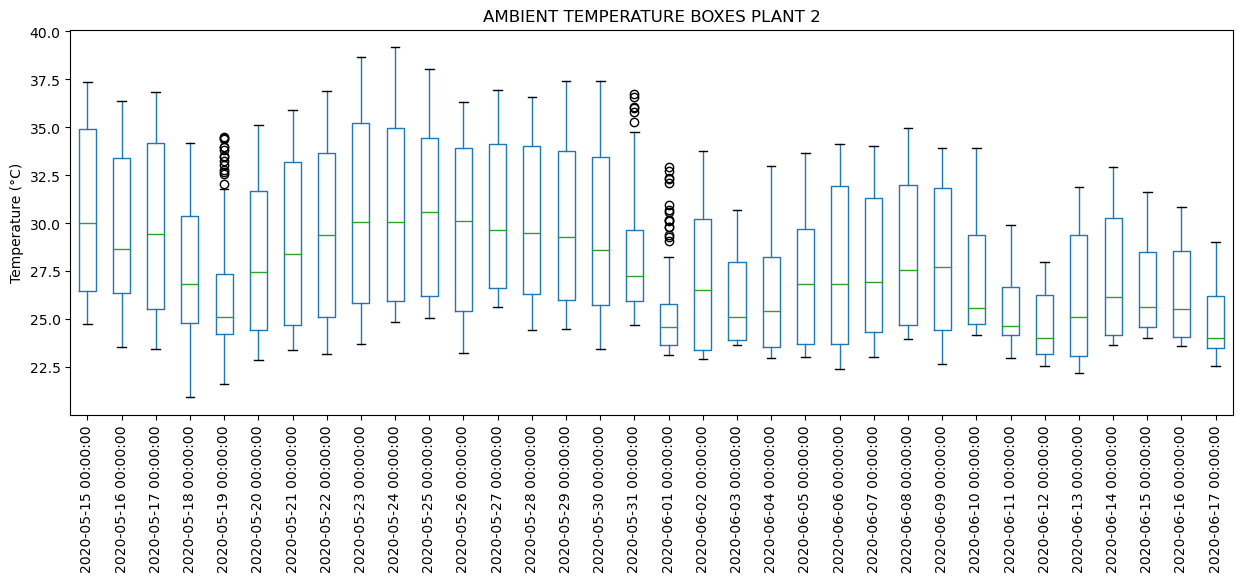

In [18]:
amb_temp2 = dfW2.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
amb_temp2.boxplot(figsize=(15,5), grid=False, rot=90)
plt.title('AMBIENT TEMPERATURE BOXES PLANT 2')
plt.ylabel('Temperature (°C)')

## 1-3 Correlation

In [21]:
pw_sensor1 = dfW1.merge(dfG1, left_on='DATE_TIME', right_on='DATE_TIME')
del pw_sensor1 ['DATE_x']
del pw_sensor1 ['DATE_y']
del pw_sensor1 ['TIME_x']
del pw_sensor1 ['TIME_y']
pw_sensor2 = dfW2.merge(dfG2, left_on='DATE_TIME', right_on='DATE_TIME')
del pw_sensor2 ['DATE_x']
del pw_sensor2 ['DATE_y']
del pw_sensor2 ['TIME_x']
del pw_sensor2 ['TIME_y']


del pw_sensor1['PLANT_ID_x']
del pw_sensor1['SOURCE_KEY_x']
del pw_sensor2['PLANT_ID_x']
del pw_sensor2['SOURCE_KEY_x']
del pw_sensor1['PLANT_ID_y']
del pw_sensor1['SOURCE_KEY_y']
del pw_sensor2['PLANT_ID_y']
del pw_sensor2['SOURCE_KEY_y']

In [22]:
pw_sensor1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 45679
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            45680 non-null  datetime64[ns]
 1   AMBIENT_TEMPERATURE  45680 non-null  float64       
 2   MODULE_TEMPERATURE   45680 non-null  float64       
 3   IRRADIATION          45680 non-null  float64       
 4   DC_POWER             45680 non-null  float64       
 5   AC_POWER             45680 non-null  float64       
 6   DAILY_YIELD          45680 non-null  float64       
 7   TOTAL_YIELD          45680 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 3.1 MB


In [23]:
correlation1 = pw_sensor1.corr(method='spearman', numeric_only=True)
correlation2 = pw_sensor2.corr(method='spearman', numeric_only=True)

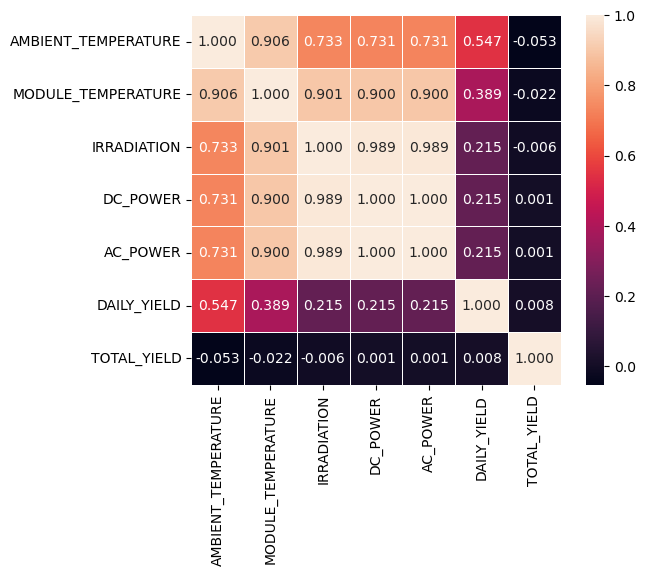

In [24]:
plt.figure(dpi=100)
sns.heatmap(correlation1, robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)
plt.show()

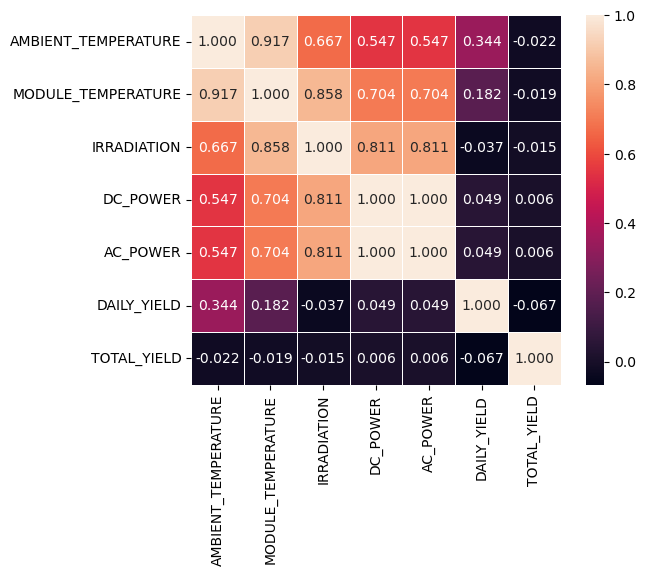

In [25]:
plt.figure(dpi=100)
sns.heatmap(correlation2, robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)
plt.show()

**Conclusions from Correlation Matrix**

1. **Temperature and Power**: There is a strong positive correlation between "AMBIENT_TEMPERATURE" and "MODULE_TEMPERATURE," indicating that ambient temperature directly affects module temperature in a solar system.

2. **Irradiation and Power**: A high positive correlation exists between "IRRADIATION" and both "DC_POWER" and "AC_POWER." This suggests that an increase in irradiation results in higher power generation by the solar system.

3. **Daily Yield**: "DAILY_YIELD" shows weak correlations with other variables, indicating that it is not strongly influenced by other variables in the dataset.

4. **TOTAL_YIELD and Other Variables**: "TOTAL_YIELD" exhibits very low or even negative correlations with other variables. This is likely due to "TOTAL_YIELD" representing cumulative production over time and having limited correlation with daily variables.

In summary, ambient temperature and irradiation significantly impact solar power generation, while daily production does not appear strongly influenced by other variables. "TOTAL_YIELD" demonstrates low or negative correlations with other variables due to its cumulative nature.
